# Working with SQLite databases in Google CoLab

In [ ]:
'''
Create an empty SQLite database
'''
import sqlite3

connection = sqlite3.connect('mydb.db')
db = connection.cursor()

# <<< After running this, check the files folder,
# you should see the mydb.db file. That's your
# empty database.
# Remember you might need to right-click and Refresh the Files list


In [ ]:
'''
Next, let's create a table to store recordsd of people, including their
names and ages in the database
'''
db.execute('''CREATE TABLE people (id INTEGER PRIMARY KEY, name TEXT, age INTEGER)''')

In [ ]:
'''
To confirm the table was created, let's print a list of all tables in the database.
We do this by querying a special table called sqlite_master
'''
db.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = db.fetchall()
print("List of Tables\n" + "-" * 40)
for table in tables:
    print(table[0])

List of Tables
----------------------------------------
people


In [ ]:
'''
Now let's insert one person record into the people table.
'''
db.execute("INSERT INTO people (name, age) VALUES ('John Doe', 30)")
connection.commit()

In [ ]:
'''
Then let's query the people table to list all records in the table
'''
db.execute("SELECT * FROM people")
print(db.fetchall())

# Should see one record listed

[(1, 'John Doe', 30)]


In [ ]:
'''
We can also insert multiple records at once using a Python list ...
'''
persons = [('Jane Doe', 25), ('Mike Johnson', 45), ('Emily Smith', 22)]
db.executemany("INSERT INTO people (name, age) VALUES (?, ?)", persons)
connection.commit()

In [ ]:
'''
Let's query the people table to list all records in the table again ...
'''
db.execute("SELECT * FROM people")
print(db.fetchall())

# Now we would see multiple records

[(1, 'John Doe', 30), (2, 'Jane Doe', 25), (3, 'Mike Johnson', 45), (4, 'Emily Smith', 22)]


In [ ]:
'''
We can also prompt the user for new records to add to a table ...
'''
while True:
    # Prompt the user for name and age
    name = input("Enter name (or press Enter to quit): ").strip()
    if not name:  # Exit the loop if no name is entered
        break
    try:
        age = int(input("Enter age: ").strip())  # Ensure age is an integer
    except ValueError:  # Handle the case where age is not an integer
        print("Please enter a valid age.")
        continue
    # Insert the name and age entered by the user into the database
    db.execute("INSERT INTO people (name, age) VALUES (?, ?)", (name, age))
    connection.commit()  # Commit changes after each insert
    print(f"Added {name} with age {age} to the database.")
print("Done")

Enter name (or press Enter to quit): Lester Scroggs
Enter age: 50
Added Lester Scroggs with age 50 to the database.
Enter name (or press Enter to quit): Jim Hollingsworth
Enter age: 68
Added Jim Hollingsworth with age 68 to the database.
Enter name (or press Enter to quit): 
Done


In [ ]:
'''
Let's query the people table to list all records in the table again,
this time we'll format it a bit better ...
'''
db.execute("SELECT * FROM people")
records = db.fetchall()

# Print column headers
print(f"{'ID':<5} {'Name':<20} {'Age':<5}")
print("-" * 40)

for record in records:
    id, name, age = record
    print(f"{id:<5} {name:<20} {age:<5}")



ID    Name                 Age  
----------------------------------------
1     John Doe             30   
2     Jane Doe             25   
3     Mike Johnson         45   
4     Emily Smith          22   
5     Lester Scroggs       50   
6     Jim Hollingsworth    68   


In [ ]:
'''
We can also insert new records into the table by importing them
from a CSV file.

For this example you'll need to uploade the people.csv example file
'''
import csv

# Open the CSV file and insert data into the database
with open('people.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader, None)  # Skip the header row
    for row in csvreader:
        db.execute("INSERT INTO people (name, age) VALUES (?, ?)", row)

# Commit changes
connection.commit()


In [ ]:
'''
Let's query the people table again,
'''
db.execute("SELECT * FROM people")
records = db.fetchall()

# Print column headers
print(f"{'ID':<5} {'Name':<20} {'Age':<5}")
print("-" * 40)

for record in records:
    id, name, age = record
    print(f"{id:<5} {name:<20} {age:<5}")


ID    Name                 Age  
----------------------------------------
1     John Doe             30   
2     Jane Doe             25   
3     Mike Johnson         45   
4     Emily Smith          22   
5     Lester Scroggs       50   
6     Jim Hollingsworth    68   
7     Coraline Hebert      41   
8     Guillermo Delacruz   59   
9     Celine Wu            65   
10    Kyson Davenport      45   
11    Adrianna Macdonald   69   
12    Hugh Landry          68   
13    Brynleigh McDowell   47   
14    Lachlan Blackwell    44   
15    Saoirse Chapman      64   
16    Knox Fitzgerald      32   
17    Marlee Gordon        45   
18    Karter Rollins       26   
19    Araceli Moss         30   
20    Porter Hawkins       43   
21    Ariel Kaur           44   
22    Augustine Cuevas     31   
23    Adele Esquivel       54   
24    Bridger Brennan      47   
25    Elodie Luna          34   
26    Erick Hanna          62   
27    Cynthia Everett      70   
28    Camilo Franco        44   
29

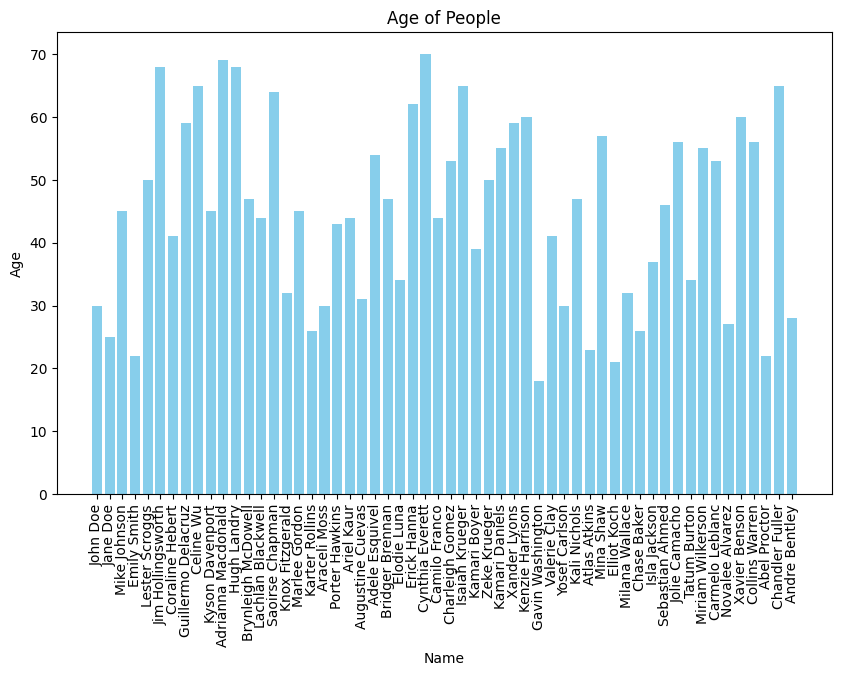

In [ ]:
'''
Now that we have a populated database we can use it in various ways.
For example, we can create a data visualization of the data, in
this case, let's create a chart of all of the people and their ages
'''
import matplotlib.pyplot as plt

# Query names and ages
db.execute("SELECT name, age FROM people")
people = db.fetchall()

# Extract data for plotting
names = [person[0] for person in people]
ages = [person[1] for person in people]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(names, ages, color='skyblue')
plt.xlabel('Name')
plt.ylabel('Age')
plt.title('Age of People')
plt.xticks(rotation=90)
plt.show()


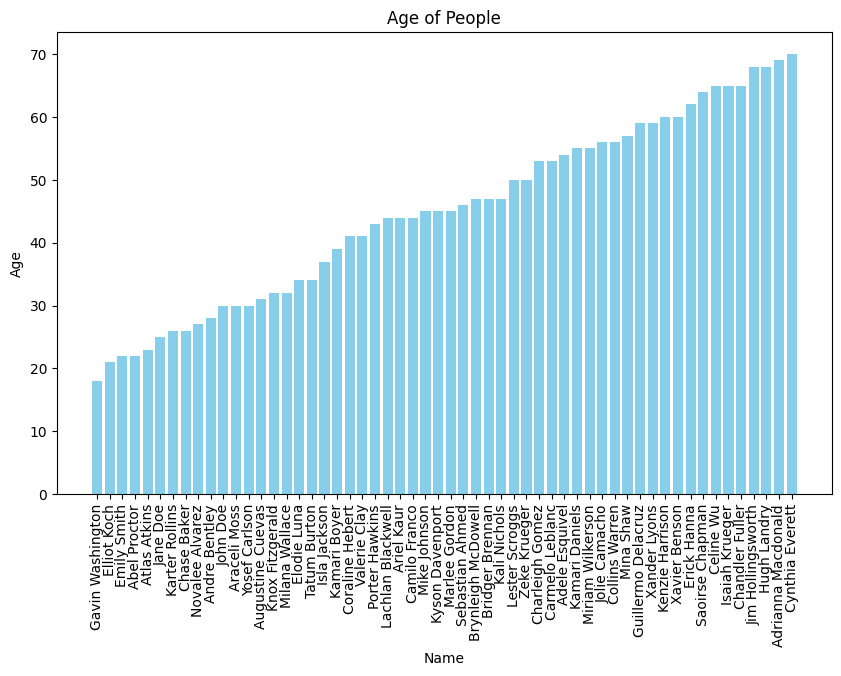

In [ ]:
'''
Database queries can help us do things like sort and filter data
by using the database's internal capabilities rather than having
to write additional Python code to do these tasks. For example,
we'll create the same chart, but we'll use the database to sort
the data by age first.
'''
import matplotlib.pyplot as plt

# Query names and ages

# The only change to this code compared to the previous
# chart example is adding a simple sort clause to our
# database query ... "ORDER BY age"
db.execute("SELECT name, age FROM people ORDER BY age")

people = db.fetchall()

# Extract data for plotting
names = [person[0] for person in people]
ages = [person[1] for person in people]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(names, ages, color='skyblue')
plt.xlabel('Name')
plt.ylabel('Age')
plt.title('Age of People')
plt.xticks(rotation=90)
plt.show()

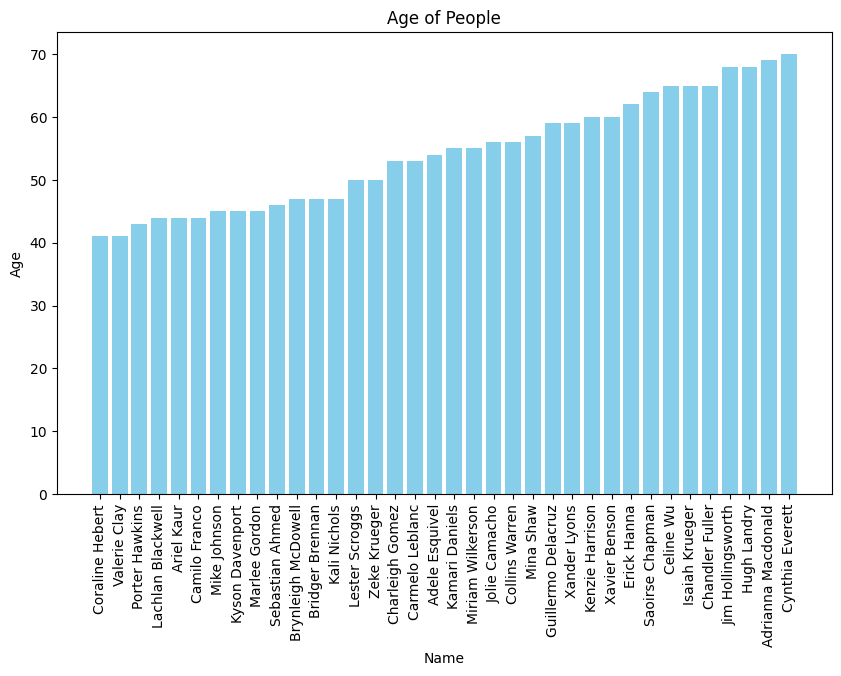

In [ ]:
'''
We can also filter data, that is, SELECT only records that
match a criteria, such as people who are 40 or over ...
'''
import matplotlib.pyplot as plt

# Query names and ages

# We added "WHERE age >= 40" to our database query ...
db.execute("SELECT name, age FROM people WHERE age >= 40 ORDER BY age")

people = db.fetchall()

# Extract data for plotting
names = [person[0] for person in people]
ages = [person[1] for person in people]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(names, ages, color='skyblue')
plt.xlabel('Name')
plt.ylabel('Age')
plt.title('Age of People')
plt.xticks(rotation=90)
plt.show()